In [1]:
# First let's import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)




In [2]:
# Now we read in the data
df = pd.read_csv(r'C:\Users\rc\Documents\movies.csv')

In [4]:
#Checking top 8 Rows
df.head(8)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0


In [5]:
# Checking the missing data for each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [46]:
# Cleaning the data 
df1 = df.dropna(subset=['gross','rating','budget'])


In [47]:
df1['gross']=df1['gross'].astype('int64')
df1['budget']=df1['budget'].astype('int64')

C:\Users\rc\AppData\Local\Temp\ipykernel_13944\592275882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gross']=df1['gross'].astype('int64')
C:\Users\rc\AppData\Local\Temp\ipykernel_13944\592275882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['budget']=df1['budget'].astype('int64')


In [48]:
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [49]:
# Sorting values on the basis on gross value
df1=df1.sort_values(by=['gross'], inplace=False, ascending=False)


In [29]:
# This is for showing whole dataset
pd.set_option('display.max_rows',None)

In [34]:
# To drop a duplicate row from a column 
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [50]:
# To drop a duplicate data
df1.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [12]:
# budget high correlation
# Company high correlation

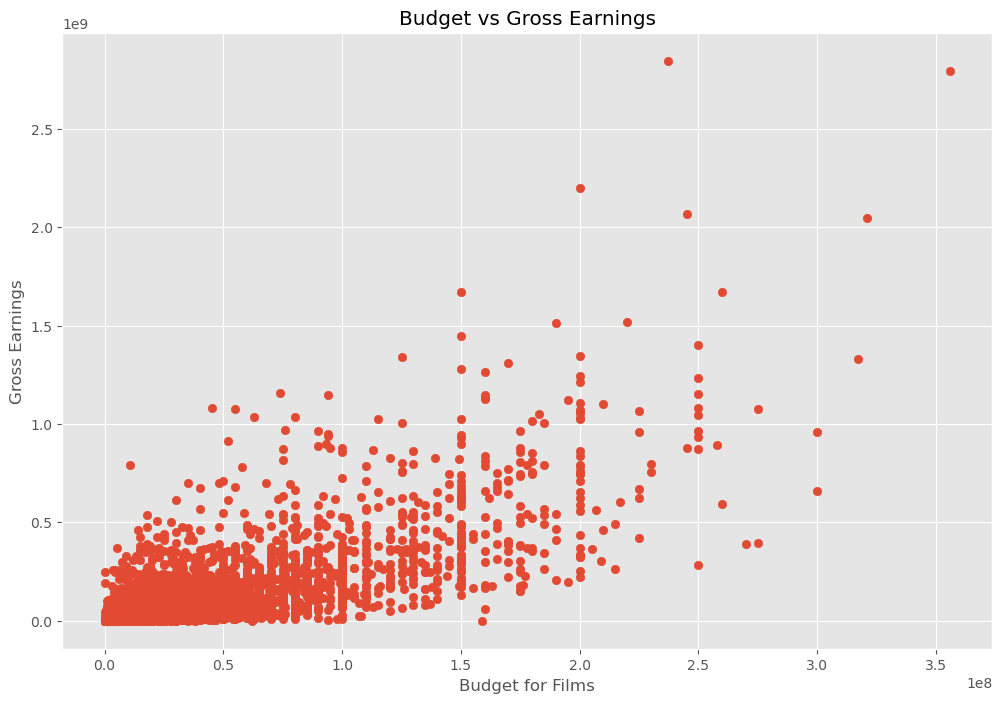

In [19]:
plt.scatter(x=df1['budget'], y=df1['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

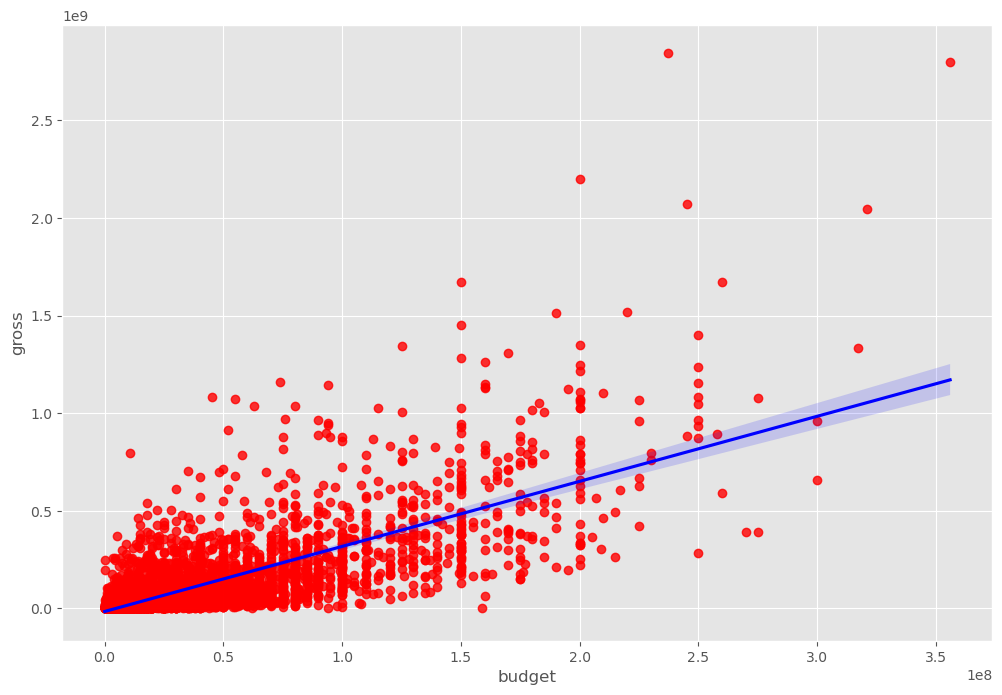

In [20]:
sns.regplot(x="budget", y="gross", data=df1, scatter_kws={"color":"red"}, line_kws={'color':'blue'})


In [29]:
# Creating df for numeric columns only for correlation
numeric_columns = df1.select_dtypes(include=['number'])

# Compute correlation matrix
# There are different types of method in corr like 'pearson', 'kendall', 'spearman'
correlation_matrix = numeric_columns.corr(method ='pearson')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056506  0.206161  0.327961  0.274395  0.075173
score    0.056506  1.000000  0.474349  0.072155  0.222709  0.414145
votes    0.206161  0.474349  1.000000  0.439757  0.614808  0.352331
budget   0.327961  0.072155  0.439757  1.000000  0.740263  0.318718
gross    0.274395  0.222709  0.614808  0.740263  1.000000  0.275830
runtime  0.075173  0.414145  0.352331  0.318718  0.275830  1.000000


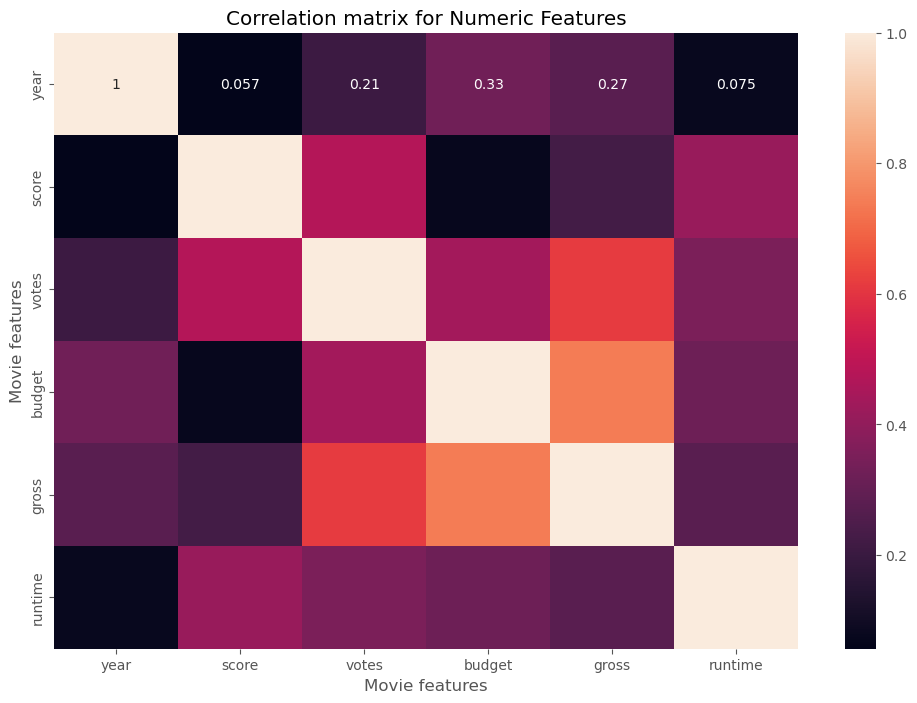

In [32]:
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()

In [44]:
df_numerized = df1

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1264,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,514,1470,47,356000000,2797501328,983,181.0
3045,4912,5,6,1997,534,7.8,1100000.0,785,1264,1073,47,200000000,2201647264,1382,194.0
6663,3645,5,0,2015,529,7.8,876000.0,768,1807,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,514,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3796,6,6,2009,890,5.8,3500.0,585,2926,1498,47,3000000,5073,1385,96.0
2434,2971,5,0,1993,1467,4.5,1900.0,1807,3104,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2000,1721,6.8,43000.0,952,1684,527,6,5000000,2554,466,108.0
272,2911,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0


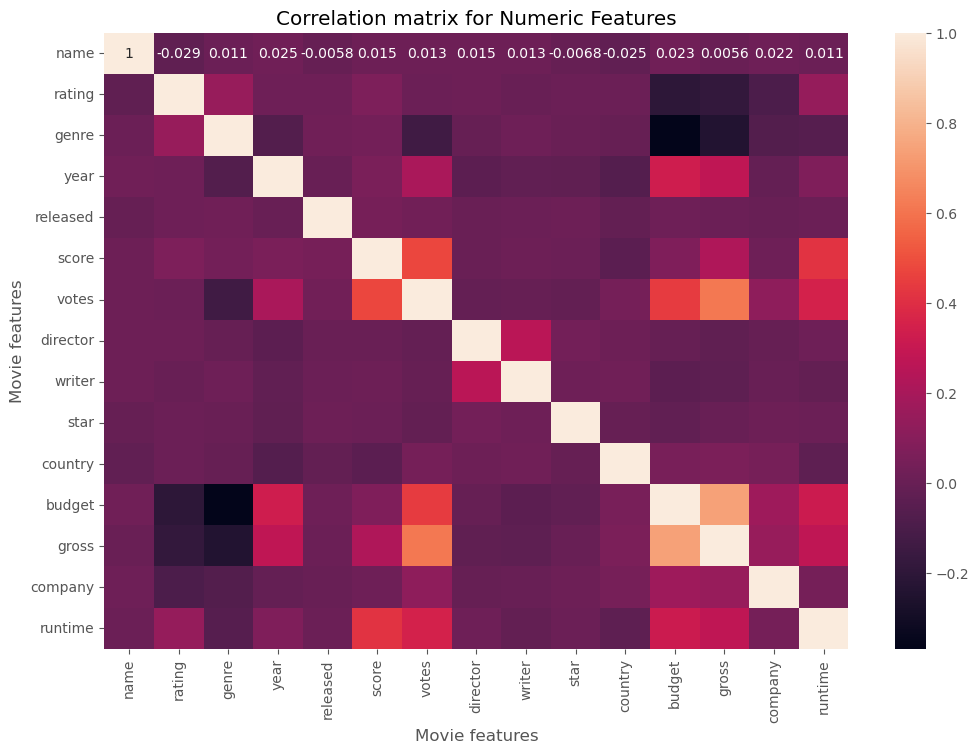

In [62]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()

In [55]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029271,0.010838,0.025441,-0.005783,0.014521,0.012585,0.015320,0.013143,-0.006788,-0.025467,0.023336,0.005613,0.021592,0.010949
rating,-0.029271,1.000000,0.147569,0.020085,0.018011,0.066335,0.006321,0.014381,-0.002966,0.009693,0.008061,-0.203531,-0.181590,-0.091306,0.140886
genre,0.010838,0.147569,1.000000,-0.073532,0.021952,0.035126,-0.135954,-0.008507,0.016969,0.003026,-0.009185,-0.368521,-0.244034,-0.071608,-0.059367
year,0.025441,0.020085,-0.073532,1.000000,-0.002033,0.056506,0.206161,-0.038676,-0.025486,-0.031559,-0.066833,0.327961,0.274395,-0.013187,0.075173
released,-0.005783,0.018011,0.021952,-0.002033,1.000000,0.046131,0.028810,0.002499,0.008480,0.015881,-0.017225,0.019835,0.008492,-0.002539,0.009172
score,0.014521,0.066335,0.035126,0.056506,0.046131,1.000000,0.474349,0.005294,0.012896,0.007683,-0.043207,0.072155,0.222709,0.021241,0.414145
votes,0.012585,0.006321,-0.135954,0.206161,0.028810,0.474349,1.000000,-0.010499,-0.005288,-0.017377,0.041443,0.439757,0.614808,0.118850,0.352331
director,0.015320,0.014381,-0.008507,-0.038676,0.002499,0.005294,-0.010499,1.000000,0.261595,0.036372,0.011209,-0.009814,-0.029664,-0.008712,0.017437
writer,0.013143,-0.002966,0.016969,-0.025486,0.008480,0.012896,-0.005288,0.261595,1.000000,0.018941,0.022496,-0.039307,-0.035842,-0.003287,-0.017340
star,-0.006788,0.009693,0.003026,-0.031559,0.015881,0.007683,-0.017377,0.036372,0.018941,1.000000,-0.010125,-0.021159,0.000218,0.014958,0.010312


In [58]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating     -0.029271
         genre       0.010838
         year        0.025441
         released   -0.005783
                       ...   
runtime  country    -0.034514
         budget      0.318718
         gross       0.275830
         company     0.037797
         runtime     1.000000
Length: 225, dtype: float64


In [59]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368521
genre    budget    -0.368521
gross    genre     -0.244034
genre    gross     -0.244034
rating   budget    -0.203531
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [61]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[(sorted_pairs) > 0.5]

print(strong_pairs)

votes     gross       0.614808
gross     votes       0.614808
          budget      0.740263
budget    gross       0.740263
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [ ]:
# My finding is that gross and votes has very good correlation but I thought that budget and gross will only be correlated well.